### Multiclass Classification using Random Forest and Logistic Regression

<img src="forest.jpg" width="500" height="600" />

In [1]:
# We want to predict handwritten numerical digits

In [ ]:
# Let us install the tensorflow module
!pip install tensorflow

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits

In [3]:
import warnings
warnings.filterwarnings("ignore")
%pwd

'C:\\Users\\Dr_Sam\\Desktop\\CHM SESSION JULY-NOV 2023\\WISDOM CLASS\\DATA SCIENCE-MACHINE LEARNING\\(WISDOM) Lecture 5 - Classification Algorithms & Features\\Lecture 3- Classification Algorithms'

In [4]:
# Loadd all the datasets
digits = load_digits()

In [5]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
# Converting the digits.data to Dataframe
dg_df = pd.DataFrame(digits.data)
dg_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [8]:
# Adding the target column
dg_df['target'] = digits.target

In [9]:
# Extracting the first 12 rows
dg_df[0:12]

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [10]:
# Checking for null values
dg_df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
60        0
61        0
62        0
63        0
target    0
Length: 65, dtype: int64

In [11]:
# Checking the shape of the dataframe
dg_df.shape

(1797, 65)

In [12]:
# checking for number of unique values in the target
dg_df.target.nunique()

10

In [13]:
# Calculating ratio of target to records
ratio = dg_df['target'].nunique()/dg_df.shape[0]
print(f'ratio = {np.round(ratio*100,2)} %')

ratio = 0.56 %


<Figure size 640x480 with 0 Axes>

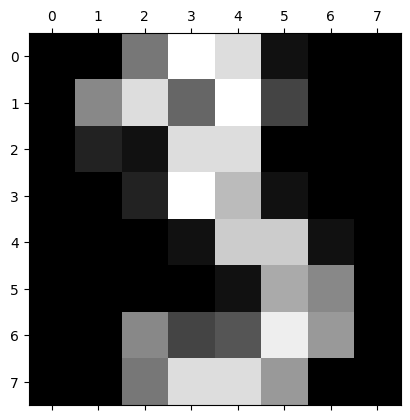

In [14]:
# Plotting the various handwriting digit
plt.gray()
plt.matshow(digits.images[3])

In [15]:
digits.target[3]

3

In [16]:
## Splitting our datasets into training and test
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.2)


In [18]:
len(X_train)

1437

In [19]:
len(X_test)

360

In [20]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [22]:
print(f'Logistic Regression Score: {np.round(lg_model.score(X_test,y_test)*100,2)}%') 
print(f'RandomForest Score: {np.round(rf_model.score(X_test,y_test)*100,2)}%')

Logistic Regression Score: 95.83%
RandomForest Score: 96.11%


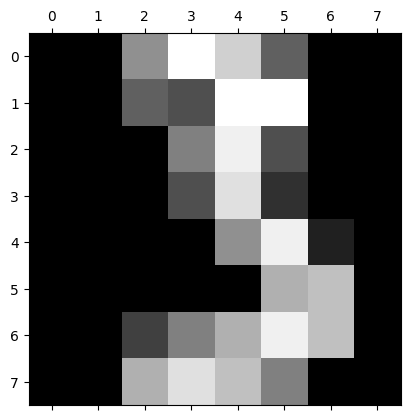

In [23]:
# Picking up a random sample
plt.matshow(digits.images[45])

In [24]:
lg_model.predict([digits.data[45]])

array([3])

In [25]:
rf_model.predict([digits.data[3]])

array([3])

In [26]:
## Playing around with confusion matrix
from sklearn.metrics import confusion_matrix

y_predicted = lg_model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  1, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 40,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 32,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  1],
       [ 0,  2,  1,  0,  0,  1,  0,  0, 35,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 29]], dtype=int64)

=>Predicted values is used as reference<=


Text(70.72222222222221, 0.5, 'Actual values')

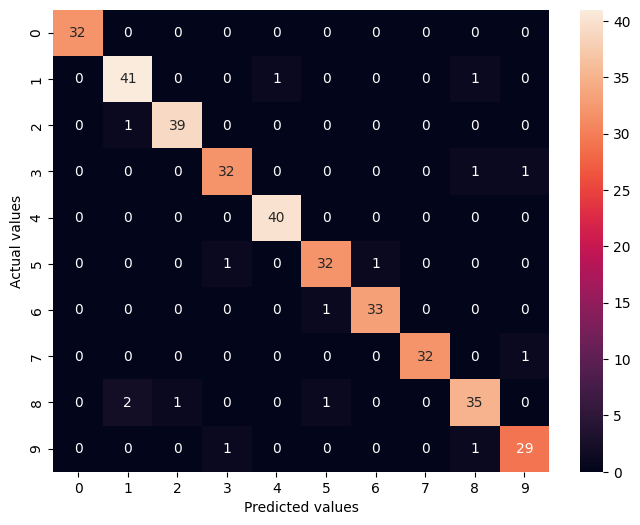

In [32]:
# Using seaborn and plt for better visualization
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True)
print('=>Predicted values is used as reference<=')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

## Using Multiple Classifier for Digit Data

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.datasets import load_digits

In [4]:
# Loadd all the datasets
digits = load_digits()

In [5]:
# Converting the digits.data to Dataframe
dg_df = pd.DataFrame(digits.data)
dg_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
# Adding the target column
dg_df['target'] = digits.target
dg_df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [7]:
# Extracting features and target variables
x_features = dg_df.iloc[:,0:64]
y_target = dg_df['target']

In [8]:
x_features

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [9]:
from time import time
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, Lasso, RidgeClassifier,SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid, RadiusNeighborsClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier,ExtraTreesClassifier 
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [10]:
# Creating a train_test split of the data
X_train, X_test, y_train, y_test = train_test_split(x_features,y_target,test_size=0.20)

In [11]:
# Checking X_train data
X_train[5]

555     10.0
104      4.0
1080     0.0
1029     2.0
1169     1.0
        ... 
776      9.0
1205    10.0
477      0.0
304      3.0
673     15.0
Name: 5, Length: 1437, dtype: float64

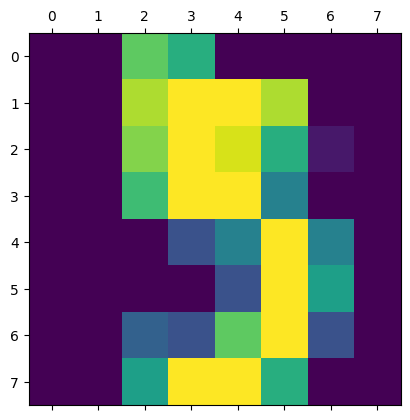

In [12]:
# Picking up a random sample
plt.matshow(digits.images[5])

In [13]:
# Checking the actual data
y_train[5]

5

In [14]:
from time import time
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, Lasso, RidgeClassifier,SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid, RadiusNeighborsClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier,ExtraTreesClassifier 
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [15]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

In [16]:
reg1 = GradientBoostingClassifier(random_state=1)
reg2 = RandomForestClassifier(random_state=1)
classifiers = [
    GaussianNB(),
    MultinomialNB(),
    ComplementNB(),
    BernoulliNB(),
    LogisticRegression(),
    Lasso(),
    RidgeClassifier(),
    SGDClassifier(),
    SVC(),
    LinearSVC(),
    KNeighborsClassifier(),
    MLPClassifier(hidden_layer_sizes=(5,), random_state=1, max_iter=500, warm_start=True),
    BaggingClassifier(estimator=ExtraTreesClassifier(),n_estimators=64, random_state=0),
    RandomForestClassifier(n_estimators=64, max_depth=10, min_samples_split=2, random_state=0),
    AdaBoostClassifier(n_estimators=5),
    ExtraTreesClassifier(n_estimators=64, max_depth=6, min_samples_split=2, random_state=0),
    GradientBoostingClassifier(n_estimators=64, max_depth=10, min_samples_split=2, random_state=0),
    HistGradientBoostingClassifier(),
    NearestCentroid(),
    VotingClassifier([("gb", reg1), ("rf", reg2)])
    #StackingClassifier(estimators=20)
]

In [17]:
# Creating a performance dataframe
performance_df = pd.DataFrame(columns= ['train_time','pred_time','train_score','test_score',"ml_model"])

In [18]:
head = len(classifiers)
for model in classifiers[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_score = np.round(model.score(X_train, y_train)*100,2)
    train_time = time() - start
    
    start = time()
    y_pred = model.predict(X_test)
    test_score = np.round(model.score(X_test, y_test)*100,2)
    predict_time = time()-start
    
    print(model)
    
    performance_df.loc[classifiers.index(model)] = [train_time,predict_time,train_score,test_score,str(model)]
    print(f'Training score: {train_score},  Test Score: {test_score}')
    print()
print('Simulation Completed')

GaussianNB()
Training score: 86.64,  Test Score: 80.0

MultinomialNB()
Training score: 91.37,  Test Score: 86.39

ComplementNB()
Training score: 83.16,  Test Score: 78.33

BernoulliNB()
Training score: 87.54,  Test Score: 83.33

LogisticRegression()
Training score: 100.0,  Test Score: 95.0

Lasso()
Training score: 47.33,  Test Score: 43.12

RidgeClassifier()
Training score: 95.41,  Test Score: 91.39

SGDClassifier()
Training score: 97.7,  Test Score: 92.5

SVC()
Training score: 99.86,  Test Score: 97.78

LinearSVC()
Training score: 98.33,  Test Score: 93.33

KNeighborsClassifier()
Training score: 99.03,  Test Score: 97.78

MLPClassifier(hidden_layer_sizes=(5,), max_iter=500, random_state=1,
              warm_start=True)
Training score: 98.05,  Test Score: 91.11

BaggingClassifier(estimator=ExtraTreesClassifier(), n_estimators=64,
                  random_state=0)
Training score: 100.0,  Test Score: 97.22

RandomForestClassifier(max_depth=10, n_estimators=64, random_state=0)
Training s

In [19]:
performance_df.sort_values(by=['train_score','test_score'], ascending=False)

,train_time,pred_time,train_score,test_score,ml_model
12,35.047678,22.280859,100.00,97.22,BaggingClassifier(estimator=ExtraTreesClassifi...
17,34.020827,0.144453,100.00,96.39,HistGradientBoostingClassifier()
19,14.030529,0.502471,100.00,96.11,"VotingClassifier(estimators=[('gb', GradientBo..."
13,0.437188,0.280958,100.00,95.56,"RandomForestClassifier(max_depth=10, n_estimat..."
4,0.155296,0.005208,100.00,95.00,LogisticRegression()
16,21.384567,0.073644,100.00,84.17,"GradientBoostingClassifier(max_depth=10, n_est..."
8,0.296230,0.112089,99.86,97.78,SVC()
10,0.415251,0.087272,99.03,97.78,KNeighborsClassifier()
9,0.152230,0.006999,98.33,93.33,LinearSVC()
15,0.231166,0.284581,98.19,96.11,"ExtraTreesClassifier(max_depth=6, n_estimators..."


## Applying Scaling to improve accuracy

In [20]:
x_features.max()

0      0.0
1      8.0
2     16.0
3     16.0
4     16.0
      ... 
59    16.0
60    16.0
61    16.0
62    16.0
63    16.0
Length: 64, dtype: float64

In [21]:
# Scaling each data by the maximum value (16)
scale_Xtrain = X_train/16
scale_Xtest = X_test/16

In [22]:
scale_Xtest

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
1384,0.0,0.0000,0.0000,0.0000,0.7500,0.6250,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.7500,0.5625,0.0000,0.0
589,0.0,0.0000,0.3750,0.6875,0.8125,0.3750,0.0000,0.0,0.0,0.4375,...,0.0000,0.0,0.0,0.0000,0.3750,0.8750,0.9375,0.7500,0.0000,0.0
978,0.0,0.0000,0.3125,0.7500,1.0000,0.9375,0.1250,0.0,0.0,0.3750,...,0.2500,0.0,0.0,0.0000,0.2500,0.9375,1.0000,0.6875,0.1250,0.0
1372,0.0,0.0000,0.0625,0.8750,0.8750,0.1250,0.0000,0.0,0.0,0.0000,...,0.0625,0.0,0.0,0.0000,0.0000,0.8750,1.0000,0.6875,0.0000,0.0
1397,0.0,0.0000,0.0000,0.0625,0.6875,0.7500,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.0000,0.0000,0.0625,1.0000,0.7500,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,0.0,0.0000,0.1250,0.7500,0.4375,0.0000,0.0000,0.0,0.0,0.0000,...,0.1875,0.0,0.0,0.0000,0.0625,0.8125,0.9375,0.5625,0.0000,0.0
1460,0.0,0.0000,0.5000,0.8125,0.7500,0.1875,0.0000,0.0,0.0,0.3750,...,0.4375,0.0,0.0,0.0000,0.5000,1.0000,1.0000,0.7500,0.0000,0.0
856,0.0,0.0625,0.8125,0.8125,0.6250,0.0000,0.0000,0.0,0.0,0.0625,...,0.0000,0.0,0.0,0.0000,0.8750,1.0000,0.9375,0.5000,0.0625,0.0
302,0.0,0.0000,0.3750,0.8750,0.8750,0.8125,0.6875,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.0000,0.4375,0.8750,0.6875,0.0625,0.0000,0.0


In [23]:
reg1 = GradientBoostingClassifier(random_state=1)
reg2 = RandomForestClassifier(random_state=1)
classifiers = [
    GaussianNB(),
    MultinomialNB(),
    ComplementNB(),
    BernoulliNB(),
    LogisticRegression(),
    Lasso(),
    RidgeClassifier(),
    SGDClassifier(),
    SVC(),
    LinearSVC(),
    KNeighborsClassifier(),
    MLPClassifier(hidden_layer_sizes=(5,), random_state=1, max_iter=500, warm_start=True),
    BaggingClassifier(estimator=ExtraTreesClassifier(),n_estimators=64, random_state=0),
    RandomForestClassifier(n_estimators=64, max_depth=10, min_samples_split=2, random_state=0),
    AdaBoostClassifier(n_estimators=5),
    ExtraTreesClassifier(n_estimators=64, max_depth=6, min_samples_split=2, random_state=0),
    GradientBoostingClassifier(n_estimators=64, max_depth=10, min_samples_split=2, random_state=0),
    HistGradientBoostingClassifier(),
    NearestCentroid(),
    VotingClassifier([("gb", reg1), ("rf", reg2)])
    #StackingClassifier(estimators=20)
]

In [26]:
# Creating a performance dataframe
scale_performance_df = pd.DataFrame(columns= ['train_time','pred_time','train_score','test_score','ml_model'])

In [27]:
head = len(classifiers)
for model in classifiers[:head]:
    start = time()
    model.fit(scale_Xtrain, y_train)
    train_score = np.round(model.score(scale_Xtrain, y_train)*100,2)
    train_time = time() - start
    
    start = time()
    y_pred = model.predict(scale_Xtest)
    test_score = np.round(model.score(scale_Xtest, y_test)*100,2)
    predict_time = time()-start
    
    print(model)
    
    scale_performance_df.loc[classifiers.index(model)] = [train_time,predict_time,train_score,test_score,str(model)]
    print(f'Training score: {train_score},  Test Score: {test_score}')
    print()
print('Simulation Completed')

GaussianNB()
Training score: 86.64,  Test Score: 80.0

MultinomialNB()
Training score: 91.37,  Test Score: 86.39

ComplementNB()
Training score: 83.16,  Test Score: 78.61

BernoulliNB()
Training score: 87.54,  Test Score: 83.33

LogisticRegression()
Training score: 98.68,  Test Score: 94.72

Lasso()
Training score: 0.0,  Test Score: -0.02

RidgeClassifier()
Training score: 95.62,  Test Score: 91.67

SGDClassifier()
Training score: 97.08,  Test Score: 91.67

SVC()
Training score: 99.86,  Test Score: 97.78

LinearSVC()
Training score: 99.03,  Test Score: 94.72

KNeighborsClassifier()
Training score: 99.03,  Test Score: 97.78

MLPClassifier(hidden_layer_sizes=(5,), max_iter=500, random_state=1,
              warm_start=True)
Training score: 98.26,  Test Score: 94.17

BaggingClassifier(estimator=ExtraTreesClassifier(), n_estimators=64,
                  random_state=0)
Training score: 100.0,  Test Score: 97.22

RandomForestClassifier(max_depth=10, n_estimators=64, random_state=0)
Training 

In [28]:
scale_performance_df.sort_values(by=['train_score','test_score'], ascending=False)

,train_time,pred_time,train_score,test_score,ml_model
12,42.007600,34.982340,100.00,97.22,BaggingClassifier(estimator=ExtraTreesClassifi...
17,49.342319,0.185276,100.00,96.39,HistGradientBoostingClassifier()
19,16.342676,0.753599,100.00,96.11,"VotingClassifier(estimators=[('gb', GradientBo..."
13,0.478757,0.437428,100.00,95.56,"RandomForestClassifier(max_depth=10, n_estimat..."
16,22.611403,0.093549,100.00,84.17,"GradientBoostingClassifier(max_depth=10, n_est..."
8,0.284170,0.104311,99.86,97.78,SVC()
10,0.147569,0.083064,99.03,97.78,KNeighborsClassifier()
9,0.101617,0.013866,99.03,94.72,LinearSVC()
4,0.293341,0.007998,98.68,94.72,LogisticRegression()
11,3.956401,0.022045,98.26,94.17,"MLPClassifier(hidden_layer_sizes=(5,), max_ite..."


## Exercise

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy 
of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

1. Sepal Length
2. Sepal Width 
3. Petal Length 
4. Petal Width

Using above 4 features you will clasify a flower in one of the three categories,

1. Setosa
2. Versicolour
3. Virginica

<img height=300 width=300 src="iris_petal_sepal.png" />